# Calibración de modelos estáticos

Se parte de un repositorio con mediciones históricas que expresen la relación a modelar como una función entre la o las variables independientes y las dependientes.

Esa relación puede evaluarse, en su variante mas simple, como una función de primer grado del tipo

$Esfuerzo=a*(LOC)+b$.

O una función exponencial del tipo

$Esfuerzo=k*(LOC)^b$.

Se utilizarán librerias Python para hacer la evaluación

## Paso 1 ##
Importar las librerias necesarias para hacer el análisis

In [23]:
import numpy as np
import pandas as pd
import argparse
import statsmodels.api as sm
import sys
import os
import matplotlib.pyplot as plt

## Paso 2 ##
Establecer el dataset con valores históricos que se utilizará para el modelado y cargarlos en un data frame

In [24]:
data = {
    'LOC': [794, 1336, 1572, 1572, 1126],
    'Esfuerzo': [1.07, 1.34, 2.27, 2.39, 0.93]
}
df = pd.DataFrame(data)
print(df)

    LOC  Esfuerzo
0   794      1.07
1  1336      1.34
2  1572      2.27
3  1572      2.39
4  1126      0.93


## Paso 3

Se realiza un gráfico con los valores en el dataset histórico

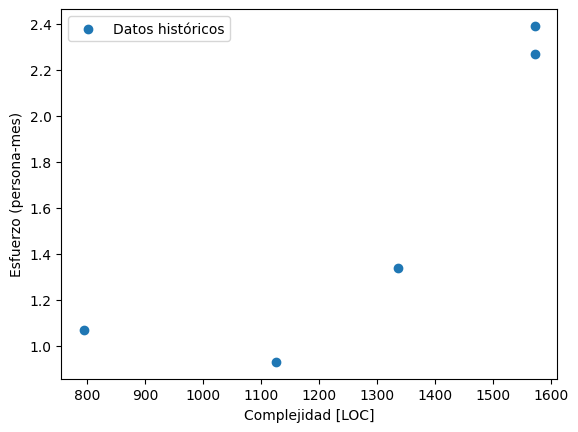

In [25]:
plt.scatter(df['LOC'], df['Esfuerzo'], label='Datos históricos')
plt.xlabel('Complejidad [LOC]')
plt.ylabel('Esfuerzo (persona-mes)')
plt.legend()
plt.show()

## Paso 4 ##

Obtener los coeficientes de la función de primer grado que expresa la correlación lineal


$Esfuerzo=a*(LOC)+b$.

En éste caso se trata de obtener los valores de **a** y **b**

La intepretación geométrica de éste tipo de modelo es que el coeficiente **a** constituye la **productividad**
mientras que el coeficiente **b** constituye un factor de escala.

El valor de R-squared ($\rho$ $^{2}$) provee una indicación sobre que proporción de la variable dependiente (Esfuerzo) es explicada por el modelo a partir de la variable independiente (LOC).

$\rho$ $^{2}$ $\geq$  0.75 se toma usualmente como un nivel adecuado de explicación

Este tipo de modelo suele ser útil cuando el rango de tamaños de proyectos es relativamente homogeneo y el esfuerzo tiende a evidenciar una relación lineal con el tamaño. 



In [26]:
   a, b = np.polyfit(df['LOC'], df['Esfuerzo'], 1)
   R = np.corrcoef(df['LOC'], df['Esfuerzo'], 1)
   R2=R*R
   r_value=R2[1][0]   

   print("Modelo lineal E=%.6f + %.6f*(LOC)" % (b,a))
   print("El R-squared=%.4f (lineal)" % (r_value))

Modelo lineal E=-0.680628 + 0.001782*(LOC)
El R-squared=0.7359 (lineal)


## Paso 5 

Se repite el análisis para obtener el modelado donde la variable dependiente (Esfuerzo) es expresada como una
función exponencial de la variable independiente (LOC)


$Esfuerzo=k*(LOC)^b$.

En éste caso se desea obtener los coeficientes **k**  y **b**

La intepretación geométrica de éste tipo de modelo es que el coeficiente **k** constituye la **productividad**
mientras que el coeficiente **b** constituye un factor de escala.

Este tipo de modelo suele ser útil cuando el rango de tamaños de proyectos es muy grande y el esfuerzo tiende a desviarse de una relación lineal con el tamaño. 

Se utilizará una librería OLS para éste modelado

In [27]:
df['logEsfuerzo']=np.log(df['Esfuerzo'])  
df['logLOC']=np.log(df['LOC'])
   
X = df['logLOC']
Y = df['logEsfuerzo']
X = sm.add_constant(X)  # Añadir una constante para el intercepto
   
mx= sm.OLS(Y, X).fit()

k=np.exp(mx.params['const'])
s=mx.params['logLOC']

print("Modelo exponencial E=%.6f*(LOC^%.6f)" % (k,s))
print("El R-squared=%.2f (exponencial)" % (mx.rsquared))


Modelo exponencial E=0.000254*(LOC^1.217732)
El R-squared=0.65 (exponencial)


## Paso 6 ##

Se obtendrán gráficos en forma conjunta mostrando el dataset con datos históricos y los resultados de ambos tipos de modelado

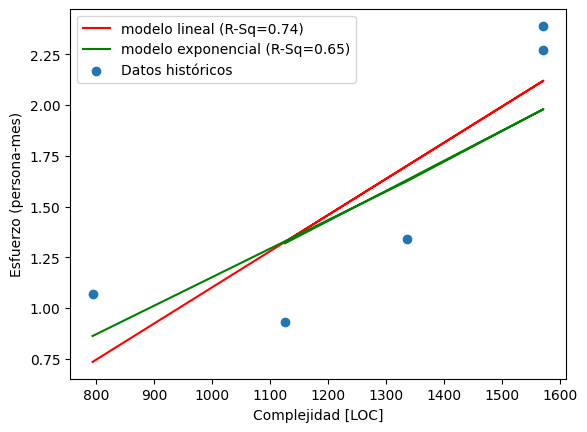

In [28]:
lbl=("modelo lineal (R-Sq=%.2f)" % (r_value))
plt.plot(df['LOC'], a*df['LOC']+b,label=lbl,color='red')

lbl=("modelo exponencial (R-Sq=%.2f)" % (mx.rsquared))
plt.plot(df['LOC'], k*(df['LOC']**s),label=lbl,color='green')

plt.scatter(df['LOC'], df['Esfuerzo'], label='Datos históricos')
plt.xlabel('Complejidad [LOC]')
plt.ylabel('Esfuerzo (persona-mes)')
plt.legend()
plt.show()

## Paso 7 ##

Los modelos calibrados pueden ahora ser utilizados para realizar la estimación de esfuerzo de un proyecto nuevo denominado "**hypernimbus**".

Supongamos que mediante una técnica de tipo "bottom-up" a partir de los requerimientos se establece que un nuevo proyecto que se desea evaluar tiene funciones que por su complejidad se proyectan como 1250 Lineas de Código (LOC).

¿Cual será el esfuerzo (en PM) necesario para su implementación?

* Evalue el esfuerzo (en PM) para implementar el proyecto usando los dos modelos calibrados.
* Actualice el gráfico anterior mostrando donde se ubica el proyecto bajo evaluación.

In [29]:
ProjName="hypernimbus"
ProjLoc=1250
El=a*ProjLoc+b
Ex=k*(ProjLoc**s)
print("Proyecto: %s LOC=%d E(lineal)=%.4f PM E(exponencial)=%.4f PM" % (ProjName,ProjLoc,El,Ex))


Proyecto: hypernimbus LOC=1250 E(lineal)=1.5465 PM E(exponencial)=1.4976 PM


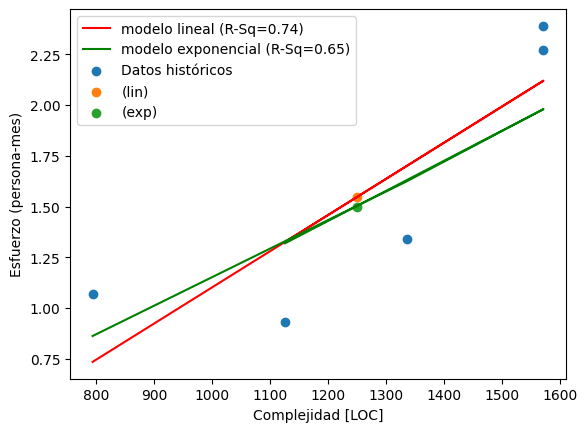

In [30]:
lbl=("modelo lineal (R-Sq=%.2f)" % (r_value))
plt.plot(df['LOC'], a*df['LOC']+b,label=lbl,color='red')

lbl=("modelo exponencial (R-Sq=%.2f)" % (mx.rsquared))
plt.plot(df['LOC'], k*(df['LOC']**s),label=lbl,color='green')

plt.scatter(df['LOC'], df['Esfuerzo'], label='Datos históricos')
plt.xlabel('Complejidad [LOC]')
plt.ylabel('Esfuerzo (persona-mes)')

plt.scatter(ProjLoc,El,label="(lin)")
plt.scatter(ProjLoc,Ex,label="(exp)")
plt.legend()
plt.show()